#import libraries 

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#datasets

In [10]:
data = pd.read_csv("dataset/Crop_recommendation.csv")
print(data.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [11]:
x=data.drop("label",axis=1)
y=data["label"]

#split data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#randomforest

In [13]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred=model.predict(x_test)

evaluation

In [15]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

#confusion matrix

In [16]:
cm=confusion_matrix(y_test,y_pred,labels=model.classes_)


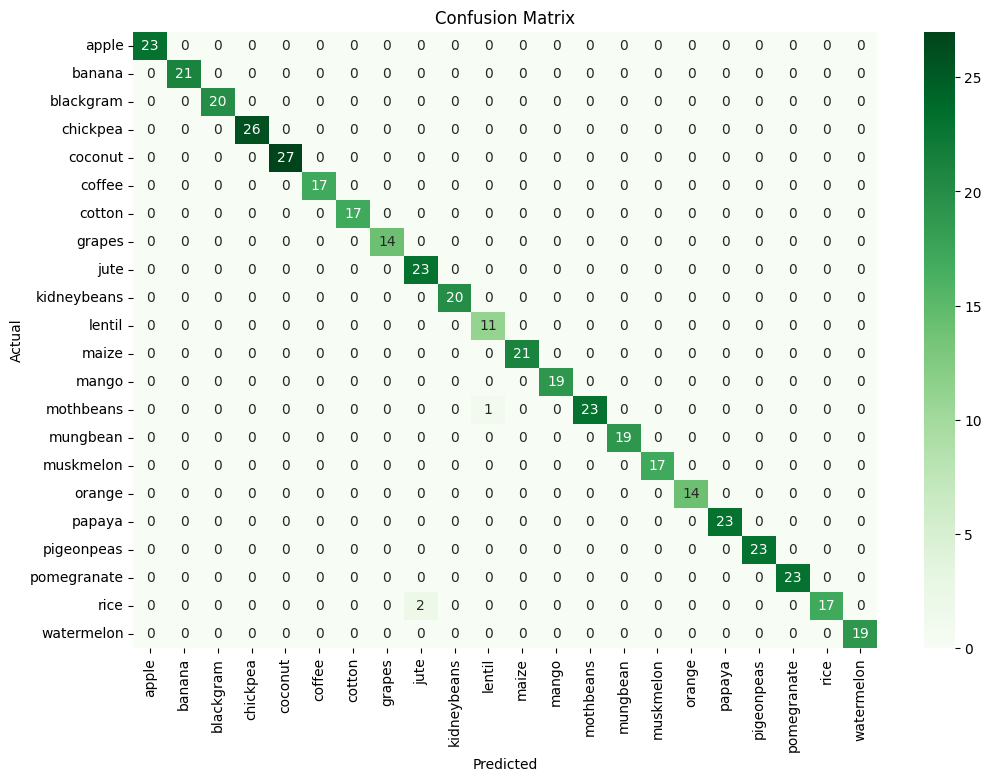

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=model.classes_,yticklabels=model.classes_,cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [18]:
#save the model
joblib.dump(model,"crop_recommendation_model.pkl")

['crop_recommendation_model.pkl']

In [19]:
# Example Prediction
sample_input = np.array([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]])
predicted_crop = model.predict(sample_input)
print("Recommended Crop:", predicted_crop[0])

Recommended Crop: rice


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


check model with exmaple 

In [20]:
# Test Case 1: Fertile soil with high rainfall (likely Rice)
sample1 = np.array([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]])
print("Recommended Crop:", model.predict(sample1)[0])

# Test Case 2: Low rainfall, warm weather (likely Maize)
sample2 = np.array([[40, 40, 40, 27.00, 60.00, 6.20, 80.00]])
print("Recommended Crop:", model.predict(sample2)[0])

# Test Case 3: Balanced nutrients, moderate climate (could be Wheat)
sample3 = np.array([[60, 55, 65, 17.00, 70.00, 6.80, 120.00]])
print("Recommended Crop:", model.predict(sample3)[0])

# Test Case 4: Acidic soil, less water (might be suitable for Coffee)
sample4 = np.array([[30, 30, 30, 23.00, 65.00, 5.50, 90.00]])
print("Recommended Crop:", model.predict(sample4)[0])

Recommended Crop: rice
Recommended Crop: mango
Recommended Crop: coffee
Recommended Crop: mango


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
# Define feature names (same order as training data)
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Example Test Case
sample1 = pd.DataFrame([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]], columns=feature_names)
print("Recommended Crop:", model.predict(sample1)[0])

sample2 = pd.DataFrame([[40, 40, 40, 27.00, 60.00, 6.20, 80.00]], columns=feature_names)
print("Recommended Crop:", model.predict(sample2)[0])

sample3 = pd.DataFrame([[60, 55, 65, 17.00, 70.00, 6.80, 120.00]], columns=feature_names)
print("Recommended Crop:", model.predict(sample3)[0])

sample4 = pd.DataFrame([[30, 30, 30, 23.00, 65.00, 5.50, 90.00]], columns=feature_names)
print("Recommended Crop:", model.predict(sample4)[0])

Recommended Crop: rice
Recommended Crop: mango
Recommended Crop: coffee
Recommended Crop: mango
